In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('full_traffic_dataset.csv')
df.head()

,EpochTime,QueueDensity1,StopDensity1,QueueDensity2,StopDensity2,QueueDensity3,StopDensity3,QueueDensity4,StopDensity4,QueueDensity5,StopDensity5,QueueDensity6,StopDensity6
0,1601429400,0.659360,0.633896,0.159140,0.154202,0.092089,0.061714,0.101130,0.090568,0.352080,0.180106,0.315316,0.298544
1,1601429401,0.670859,0.598832,0.159121,0.152003,0.050915,0.042297,0.101641,0.096229,0.377484,0.170706,0.294729,0.196020
2,1601429402,0.667614,0.522409,0.154927,0.135835,0.045972,0.035337,0.099729,0.086547,0.374875,0.191809,0.314098,0.169138
3,1601429403,0.668366,0.492683,0.160855,0.156014,0.069805,0.048238,0.101725,0.097987,0.396158,0.150092,0.343561,0.174536
4,1601429404,0.671207,0.632485,0.160698,0.156109,0.096888,0.052122,0.099992,0.096891,0.425739,0.255422,0.316831,0.090072


In [12]:
# --- Convert 'EpochTime' to a readable datetime format ---
# The 'unit='s'' argument tells pandas that the epoch time is in seconds.
df['timestamp'] = pd.to_datetime(df['EpochTime'], unit='s')

# --- Check for Missing Values ---
print("\nChecking for missing values in each column:")
print(df.isnull().sum())

# --- Check for and Remove Duplicate Rows ---
duplicates_before = df.duplicated().sum()
print(f"\nNumber of duplicate rows found: {duplicates_before}")
if duplicates_before > 0:
    df.drop_duplicates(inplace=True)
    print("✅ Duplicate rows have been removed.")

# --- Initial Feature Engineering: Extracting time-based features ---
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek  # Monday=0, Sunday=6
df['day_name'] = df['timestamp'].dt.day_name()
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int) # 1 for weekend, 0 for weekday

print("✅ New time-based features (date, hour, day_name, etc.) have been created.")

# --- Final Touches ---
# Reorder columns for better readability and drop the original EpochTime column
df = df[['timestamp', 'date', 'hour', 'day_name', 'is_weekend'] + [col for col in df.columns if col not in ['timestamp', 'date', 'hour', 'day_name', 'is_weekend', 'EpochTime']]]

print("\n✅ Preprocessing and cleaning complete.")


Checking for missing values in each column:
EpochTime        0
QueueDensity1    0
StopDensity1     0
QueueDensity2    0
StopDensity2     0
QueueDensity3    0
StopDensity3     0
QueueDensity4    0
StopDensity4     0
QueueDensity5    0
StopDensity5     0
QueueDensity6    0
StopDensity6     0
timestamp        0
dtype: int64

Number of duplicate rows found: 0
✅ New time-based features (date, hour, day_name, etc.) have been created.

✅ Preprocessing and cleaning complete.


In [13]:
# --- Display the first 5 rows of the processed DataFrame ---
print("\nFirst 5 rows of the preprocessed data:")
display(df.head())

# --- Display information about the DataFrame ---
print("\nData types and memory usage of the new DataFrame:")
df.info()

# --- Save the cleaned data to a new file ---
# We'll use this file in the next steps of the project.
output_filename = 'preprocessed_traffic_data.csv'
df.to_csv(output_filename, index=False)

print(f"\n✅ Preprocessed data has been saved to '{output_filename}'.")


First 5 rows of the preprocessed data:


,timestamp,date,hour,day_name,is_weekend,QueueDensity1,StopDensity1,QueueDensity2,StopDensity2,QueueDensity3,StopDensity3,QueueDensity4,StopDensity4,QueueDensity5,StopDensity5,QueueDensity6,StopDensity6,day_of_week
0,2020-09-30 01:30:00,2020-09-30,1,Wednesday,0,0.659360,0.633896,0.159140,0.154202,0.092089,0.061714,0.101130,0.090568,0.352080,0.180106,0.315316,0.298544,2
1,2020-09-30 01:30:01,2020-09-30,1,Wednesday,0,0.670859,0.598832,0.159121,0.152003,0.050915,0.042297,0.101641,0.096229,0.377484,0.170706,0.294729,0.196020,2
2,2020-09-30 01:30:02,2020-09-30,1,Wednesday,0,0.667614,0.522409,0.154927,0.135835,0.045972,0.035337,0.099729,0.086547,0.374875,0.191809,0.314098,0.169138,2
3,2020-09-30 01:30:03,2020-09-30,1,Wednesday,0,0.668366,0.492683,0.160855,0.156014,0.069805,0.048238,0.101725,0.097987,0.396158,0.150092,0.343561,0.174536,2
4,2020-09-30 01:30:04,2020-09-30,1,Wednesday,0,0.671207,0.632485,0.160698,0.156109,0.096888,0.052122,0.099992,0.096891,0.425739,0.255422,0.316831,0.090072,2



Data types and memory usage of the new DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160040 entries, 0 to 2160039
Data columns (total 18 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      datetime64[ns]
 1   date           object        
 2   hour           int32         
 3   day_name       object        
 4   is_weekend     int32         
 5   QueueDensity1  float64       
 6   StopDensity1   float64       
 7   QueueDensity2  float64       
 8   StopDensity2   float64       
 9   QueueDensity3  float64       
 10  StopDensity3   float64       
 11  QueueDensity4  float64       
 12  StopDensity4   float64       
 13  QueueDensity5  float64       
 14  StopDensity5   float64       
 15  QueueDensity6  float64       
 16  StopDensity6   float64       
 17  day_of_week    int32         
dtypes: datetime64[ns](1), float64(12), int32(3), object(2)
memory usage: 271.9+ MB

✅ Preprocessed data has been saved to 'preprocessed

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

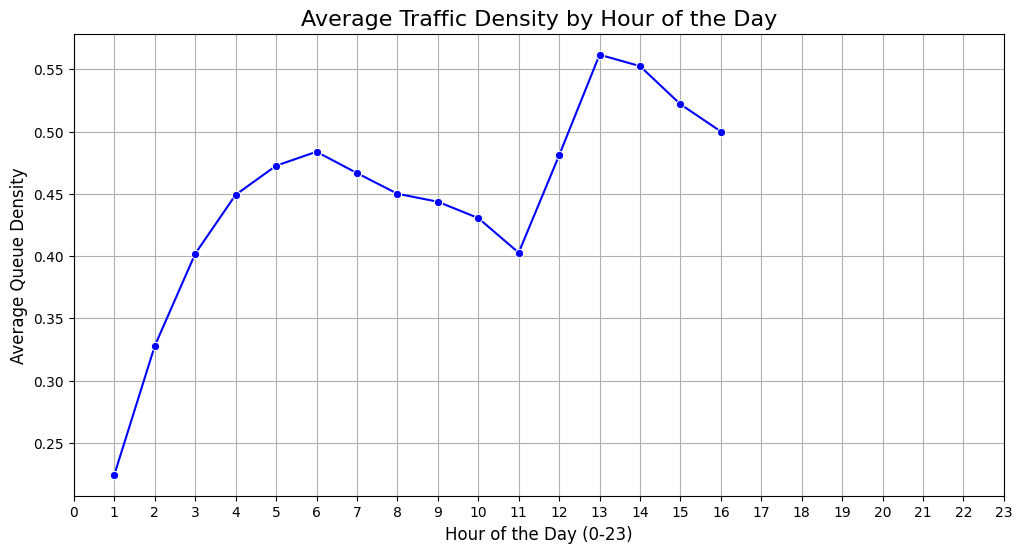

In [15]:
# Calculate the average queue density across all 6 cameras for each row
queue_density_cols = ['QueueDensity1', 'QueueDensity2', 'QueueDensity3', 'QueueDensity4', 'QueueDensity5', 'QueueDensity6']
df['AvgQueueDensity'] = df[queue_density_cols].mean(axis=1)

# Group by hour and calculate the mean of the average density
hourly_traffic = df.groupby('hour')['AvgQueueDensity'].mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='AvgQueueDensity', data=hourly_traffic, marker='o', color='b')
plt.title('Average Traffic Density by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day (0-23)', fontsize=12)
plt.ylabel('Average Queue Density', fontsize=12)
plt.xticks(range(0, 24)) # Set x-axis ticks for every hour
plt.grid(True)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_16612\903565212.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_name', y='AvgQueueDensity', data=daily_traffic, palette='viridis')


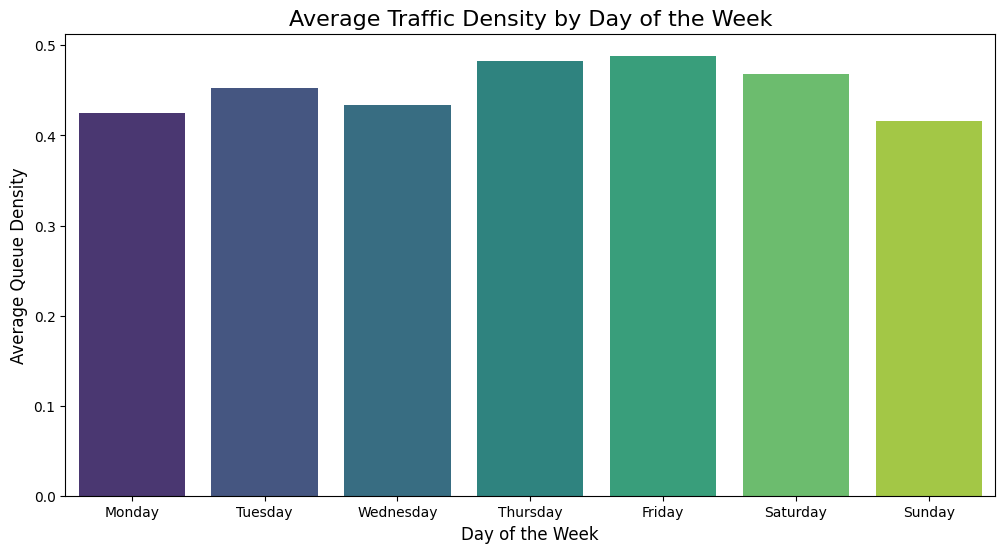

In [16]:
# Group by day name and calculate the mean density
daily_traffic = df.groupby('day_name')['AvgQueueDensity'].mean().reset_index()

# Ensure the days are in the correct order for plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_traffic['day_name'] = pd.Categorical(daily_traffic['day_name'], categories=day_order, ordered=True)
daily_traffic = daily_traffic.sort_values('day_name')

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='day_name', y='AvgQueueDensity', data=daily_traffic, palette='viridis')
plt.title('Average Traffic Density by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Queue Density', fontsize=12)
plt.show()

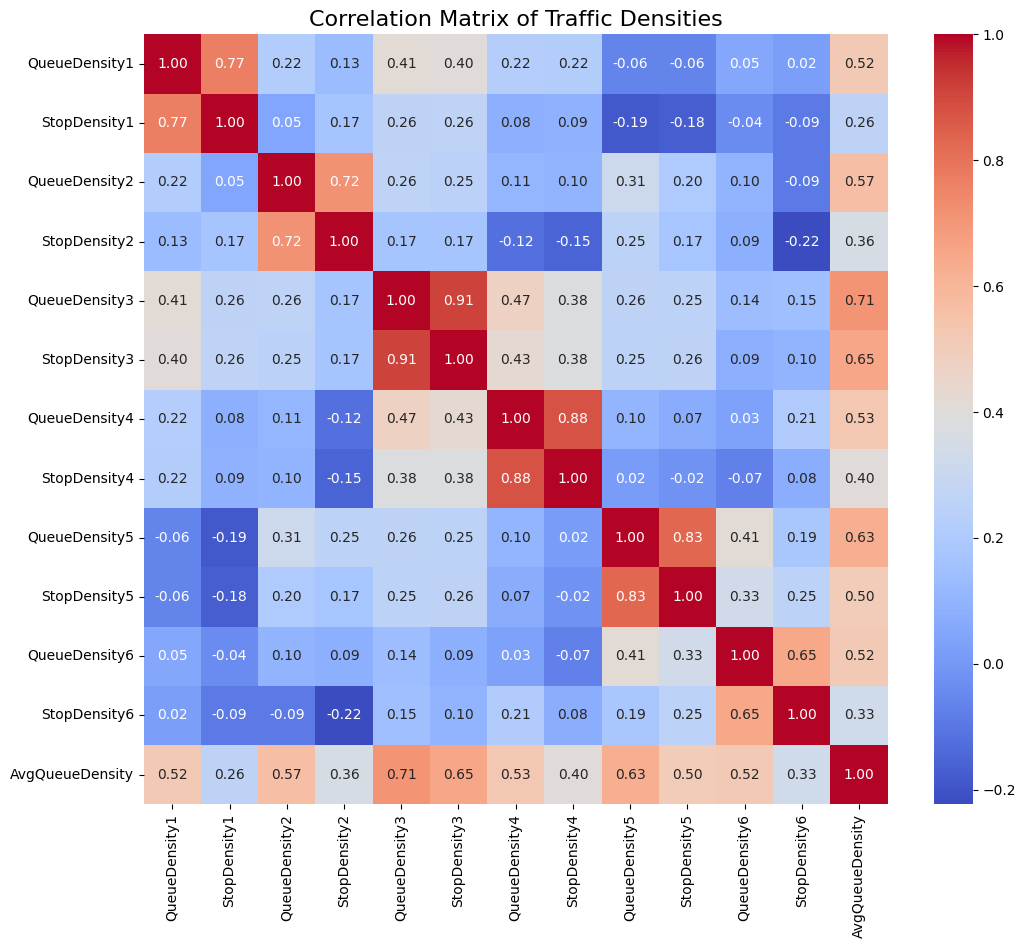

In [17]:
# Select only the density columns for the correlation matrix
density_cols = [col for col in df.columns if 'Density' in col]
correlation_matrix = df[density_cols].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Traffic Densities', fontsize=16)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [19]:
# --- Feature Engineering: Create the Target Variable ---
# Calculate the average queue density across all 6 cameras
queue_density_cols = ['QueueDensity1', 'QueueDensity2', 'QueueDensity3', 'QueueDensity4', 'QueueDensity5', 'QueueDensity6']
df['AvgQueueDensity'] = df[queue_density_cols].mean(axis=1)


# --- Define Features (X) and Target (y) ---
features = ['hour', 'day_of_week', 'is_weekend']
target = 'AvgQueueDensity'

X = df[features]
y = df[target]

# --- Time-Based Train-Test Split ---
# We don't shuffle the data to respect the time sequence
test_size = 0.2 # We'll use the latest 20% of the data for testing
split_index = int(len(df) * (1 - test_size))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"Data split into training and testing sets:")
print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size:  {len(X_test)} samples")

Data split into training and testing sets:
Training set size: 1728032 samples
Testing set size:  432008 samples


In [20]:
# --- Initialize the models ---
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)
}

# --- Train, Predict, and Evaluate ---
results = {}
for name, model in models.items():
    print(f"--- Training {name} ---")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    
    # Store results
    results[name] = {
        "MAE": mae,
        "RMSE": rmse,
        "R-squared": r2
    }
    
    print(f"✅ {name} trained and evaluated.")

# --- Display the results ---
print("\n--- Model Performance Comparison ---")
results_df = pd.DataFrame(results).T
print(results_df)

--- Training Linear Regression ---
✅ Linear Regression trained and evaluated.
--- Training Random Forest ---
✅ Random Forest trained and evaluated.
--- Training XGBoost ---
✅ XGBoost trained and evaluated.

--- Model Performance Comparison ---
                        MAE      RMSE  R-squared
Linear Regression  0.111253  0.134076   0.102694
Random Forest      0.095785  0.116899   0.317879
XGBoost            0.095795  0.116909   0.317758


In [21]:

# --- Create Lag Features ---
# We'll create lags for 5, 15, and 30 seconds ago.
# The .shift(n) function pushes the data down by 'n' rows.
df['lag_5_sec'] = df['AvgQueueDensity'].shift(5)
df['lag_15_sec'] = df['AvgQueueDensity'].shift(15)
df['lag_30_sec'] = df['AvgQueueDensity'].shift(30)

# Creating lag features introduces missing values (NaNs) at the beginning of the dataset.
# We'll drop these rows as they cannot be used for training.
df.dropna(inplace=True)

print("✅ Lag features created and NaN values dropped.")

✅ Lag features created and NaN values dropped.


In [22]:
# --- Define NEW Features (X) and Target (y) ---
features = [
    'hour', 
    'day_of_week', 
    'is_weekend',
    'lag_5_sec',      # Including our new features
    'lag_15_sec',
    'lag_30_sec'
]
target = 'AvgQueueDensity'

X = df[features]
y = df[target]

# --- Time-Based Train-Test Split ---
test_size = 0.2
split_index = int(len(df) * (1 - test_size))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size:  {len(X_test)} samples")


# --- Initialize, Train, and Evaluate Models ---
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)
}

results_with_lag = {}
for name, model in models.items():
    print(f"--- Training {name} with lag features ---")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Store results
    results_with_lag[name] = {
        "MAE": mean_absolute_error(y_test, predictions),
        "RMSE": np.sqrt(mean_squared_error(y_test, predictions)),
        "R-squared": r2_score(y_test, predictions)
    }
    print(f"✅ {name} trained and evaluated.")

# --- Display the results ---
print("\n--- Model Performance with Lag Features ---")
results_df_lag = pd.DataFrame(results_with_lag).T
print(results_df_lag)


Training set size: 1728008 samples
Testing set size:  432002 samples
--- Training Linear Regression with lag features ---
✅ Linear Regression trained and evaluated.
--- Training Random Forest with lag features ---
✅ Random Forest trained and evaluated.
--- Training XGBoost with lag features ---
✅ XGBoost trained and evaluated.

--- Model Performance with Lag Features ---
                        MAE      RMSE  R-squared
Linear Regression  0.022052  0.029667   0.956064
Random Forest      0.022527  0.030125   0.954698
XGBoost            0.022598  0.029891   0.955398


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

In [24]:
# --- Create Target and Lag Features ---
queue_density_cols = ['QueueDensity1', 'QueueDensity2', 'QueueDensity3', 'QueueDensity4', 'QueueDensity5', 'QueueDensity6']
df['AvgQueueDensity'] = df[queue_density_cols].mean(axis=1)

df['lag_5_sec'] = df['AvgQueueDensity'].shift(5)
df['lag_15_sec'] = df['AvgQueueDensity'].shift(15)
df['lag_30_sec'] = df['AvgQueueDensity'].shift(30)

df.dropna(inplace=True)

# --- Define Features (X) and Target (y) ---
features = ['hour', 'day_of_week', 'is_weekend', 'lag_5_sec', 'lag_15_sec', 'lag_30_sec']
target = 'AvgQueueDensity'

X = df[features]
y = df[target]

# For this final step, we can use all the data to train the grid search
# Or, you could split the data again if you want to hold back a final validation set
X_train, y_train = X, y

print("✅ Data prepared for tuning.")

✅ Data prepared for tuning.


In [25]:
# --- Define the grid of hyperparameters to search ---
# We'll test different combinations of these settings
param_grid = {
    'n_estimators': [100, 200],         # Number of boosting rounds
    'max_depth': [3, 5, 7],             # Maximum depth of a tree
    'learning_rate': [0.05, 0.1],     # Step size shrinkage
    'subsample': [0.7, 1.0]             # Subsample ratio of the training instance
}

# --- Initialize the XGBoost model ---
xgbr = xgb.XGBRegressor(objective='reg:squarederror', seed=42)

# --- Initialize GridSearchCV ---
# cv=3 means 3-fold cross-validation
# n_jobs=-1 uses all available CPU cores to speed up the process
grid_search = GridSearchCV(estimator=xgbr, 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           scoring='neg_mean_squared_error',
                           verbose=2)

# --- Run the Grid Search ---
print("\nStarting Hyperparameter Tuning... This may take a while.")
grid_search.fit(X_train, y_train)
print("✅ Hyperparameter Tuning complete.")

# --- Print the Best Parameters ---
print("\n--- Best Hyperparameters Found ---")
print(grid_search.best_params_)


Starting Hyperparameter Tuning... This may take a while.
Fitting 3 folds for each of 24 candidates, totalling 72 fits
✅ Hyperparameter Tuning complete.

--- Best Hyperparameters Found ---
{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}


In [26]:
# The 'grid_search' object now contains the best model found
best_model = grid_search.best_estimator_

# You can now use this 'best_model' to make predictions
# For example:
# predictions = best_model.predict(some_new_data)

print("\nThe best model is now trained and ready for predictions.")


The best model is now trained and ready for predictions.


C:\Users\hp\AppData\Local\Temp\ipykernel_16612\3768010856.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='rocket')


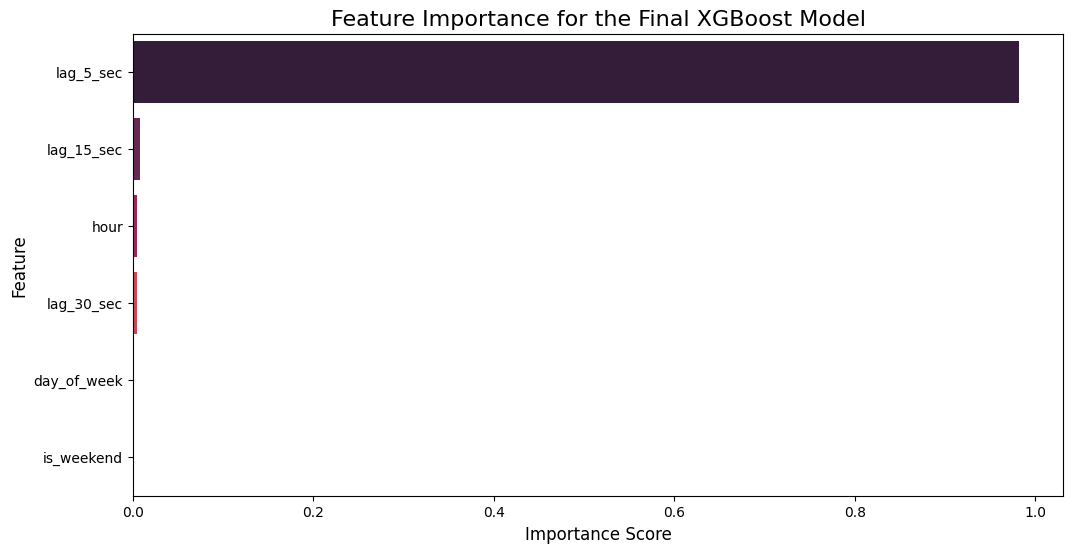

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure 'best_model' is your trained XGBoost model from GridSearchCV
# and 'X_train' contains the feature names.

# Get feature importance scores
feature_importances = best_model.feature_importances_

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='rocket')
plt.title('Feature Importance for the Final XGBoost Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

In [29]:
import joblib

# Save the model to a file
filename = 'final_traffic_model.joblib'
joblib.dump(best_model, filename)

print(f"✅ Model saved successfully as '{filename}'")

# --- How to load the model back later ---
# loaded_model = joblib.load(filename)
# print("\n✅ Model loaded successfully from file.")

✅ Model saved successfully as 'final_traffic_model.joblib'


In [30]:
# --- First, load your saved model ---
loaded_model = joblib.load('final_traffic_model.joblib')

# --- Simulate new, unseen data ---
# This data must have the same features your model was trained on.
new_data = pd.DataFrame({
    'hour': [8, 17, 22], # Morning rush, evening rush, late night
    'day_of_week': [0, 2, 5], # Monday, Wednesday, Saturday
    'is_weekend': [0, 0, 1],
    'lag_5_sec': [0.65, 0.82, 0.15], # Example recent traffic
    'lag_15_sec': [0.61, 0.79, 0.18],
    'lag_30_sec': [0.58, 0.75, 0.20]
})

# --- Use the loaded model to make predictions ---
new_predictions = loaded_model.predict(new_data)

print("--- Predictions for New Data ---")
for i, prediction in enumerate(new_predictions):
    print(f"Prediction for sample {i+1}: {prediction:.4f}")

--- Predictions for New Data ---
Prediction for sample 1: 0.6351
Prediction for sample 2: 0.6719
Prediction for sample 3: 0.1699
